# Synthetic Population Exploration
This notebook explores the synthetic life insurance population dataset (10,000 records) and visualizes distributions and risk patterns.

In [18]:
# Imports and setup
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Plot settings
%matplotlib inline
sns.set_theme(style="whitegrid", context="notebook")
plt.rcParams["figure.figsize"] = (8,5)

In [19]:
# Load dataset and quick overview
data_path = Path.cwd()  # Notebook is saved next to the data file
json_file = data_path / "synthetic_life_insurance_10000.json"
with open(json_file, "r", encoding="utf-8") as f:
    data = json.load(f)

df = pd.DataFrame(data)
display(df.head())
print("\nShape:", df.shape)
print("\nInfo:")
df.info()
display(df.describe(include="all"))
print("\nDeath rate (20y): {:.2%}".format(df["died_within_20y"].mean()))

,gender,age,marital_status,height_cm,weight_kg,bmi,smoking,packs_per_week,drug_use,drug_frequency,...,medication_type,sports_activity_h_per_week,earning_chf,application_year,risk_multiplier,p_true_20y,underwriter_score,underwriter_decision,premium_loading,died_within_20y
0,m,21,divorced,165,72.4,26.6,False,0,False,0.0,...,safe,4,242187,2005,0.780347,0.0932,0.1027,accept_with_premium,0.12,True
1,m,72,divorced,167,89.1,31.9,True,2,False,0.0,...,warning,9,124800,2009,4.588400,0.5483,0.4847,reject,0.00,False
2,m,26,single,192,95.7,26.0,True,1,False,0.0,...,safe,3,72834,2008,1.253802,0.1498,0.1637,accept_with_premium,0.48,False
3,f,52,married,193,107.2,28.8,False,0,False,0.0,...,safe,10,150285,2006,1.439544,0.1720,0.2059,accept_with_premium,0.74,False
4,f,35,married,197,87.7,22.6,False,0,False,0.0,...,safe,6,186208,2008,0.760137,0.0908,0.1072,accept_with_premium,0.14,True



Shape: (10000, 30)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gender                      10000 non-null  object 
 1   age                         10000 non-null  int64  
 2   marital_status              10000 non-null  object 
 3   height_cm                   10000 non-null  int64  
 4   weight_kg                   10000 non-null  float64
 5   bmi                         10000 non-null  float64
 6   smoking                     10000 non-null  bool   
 7   packs_per_week              10000 non-null  int64  
 8   drug_use                    10000 non-null  bool   
 9   drug_frequency              10000 non-null  float64
 10  drug_type                   10000 non-null  object 
 11  staying_abroad              10000 non-null  bool   
 12  abroad_type                 10000 non-null  object 
 13  dange

,gender,age,marital_status,height_cm,weight_kg,bmi,smoking,packs_per_week,drug_use,drug_frequency,...,medication_type,sports_activity_h_per_week,earning_chf,application_year,risk_multiplier,p_true_20y,underwriter_score,underwriter_decision,premium_loading,died_within_20y
count,10000,10000.000000,10000,10000.000000,10000.000000,10000.000000,10000,10000.00000,10000,10000.00000,...,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000.000000,10000
unique,2,NaN,4,NaN,NaN,NaN,2,NaN,2,NaN,...,3,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,2
top,m,NaN,married,NaN,NaN,NaN,False,NaN,False,NaN,...,safe,NaN,NaN,NaN,NaN,NaN,NaN,accept_with_premium,NaN,False
freq,5022,NaN,2564,NaN,NaN,NaN,7428,NaN,8983,NaN,...,5973,NaN,NaN,NaN,NaN,NaN,NaN,4160,NaN,7204
mean,NaN,51.466700,NaN,175.062200,78.973850,25.593400,NaN,0.39070,NaN,0.27532,...,NaN,4.999200,141115.884800,2007.505800,2.371574,0.280000,0.280417,NaN,0.219268,NaN
std,NaN,19.581124,NaN,14.813024,17.950366,3.897829,NaN,0.87323,NaN,0.91387,...,NaN,3.166228,63458.349389,1.707881,1.566164,0.168567,0.173514,NaN,0.314698,NaN
min,NaN,18.000000,NaN,150.000000,37.000000,16.000000,NaN,0.00000,NaN,0.00000,...,NaN,0.000000,30011.000000,2005.000000,0.640342,0.076500,0.048600,NaN,0.000000,NaN
25%,NaN,34.000000,NaN,162.000000,65.700000,22.900000,NaN,0.00000,NaN,0.00000,...,NaN,2.000000,85679.000000,2006.000000,1.305753,0.156000,0.148875,NaN,0.000000,NaN
50%,NaN,51.000000,NaN,175.000000,77.100000,25.500000,NaN,0.00000,NaN,0.00000,...,NaN,5.000000,141757.500000,2008.000000,2.123632,0.253800,0.247000,NaN,0.000000,NaN
75%,NaN,68.000000,NaN,188.000000,90.900000,28.200000,NaN,0.00000,NaN,0.00000,...,NaN,8.000000,196417.500000,2009.000000,2.865112,0.342400,0.351825,NaN,0.420000,NaN



Death rate (20y): 27.96%


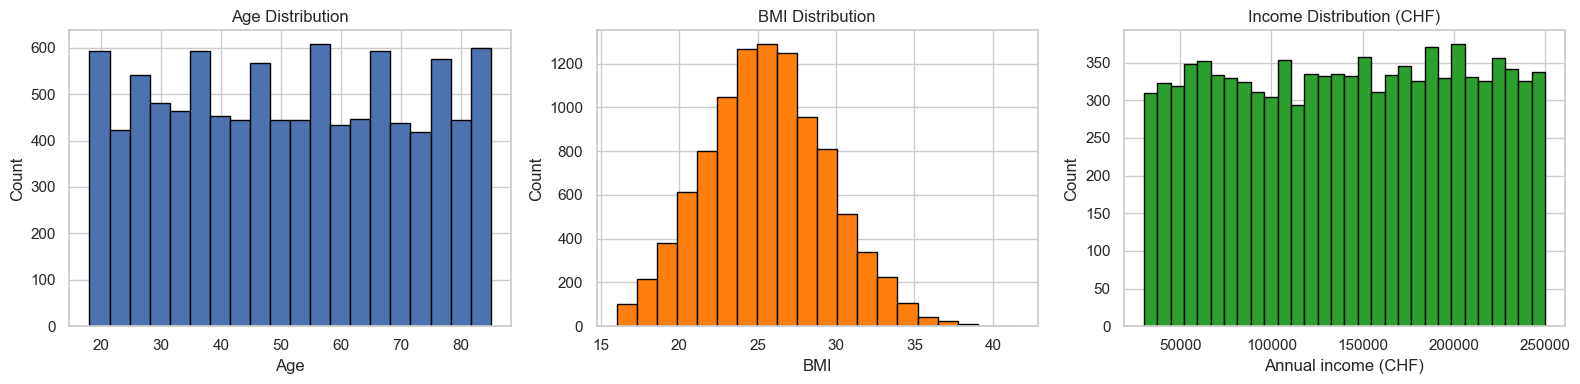

In [20]:
# Distributions: Age, BMI, Income
fig, axes = plt.subplots(1, 3, figsize=(16,4))

axes[0].hist(df["age"], bins=20, edgecolor="black")
axes[0].set_title("Age Distribution")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Count")

axes[1].hist(df["bmi"], bins=20, edgecolor="black", color="tab:orange")
axes[1].set_title("BMI Distribution")
axes[1].set_xlabel("BMI")
axes[1].set_ylabel("Count")

axes[2].hist(df["earning_chf"], bins=30, edgecolor="black", color="tab:green")
axes[2].set_title("Income Distribution (CHF)")
axes[2].set_xlabel("Annual income (CHF)")
axes[2].set_ylabel("Count")

plt.tight_layout()
plt.show()

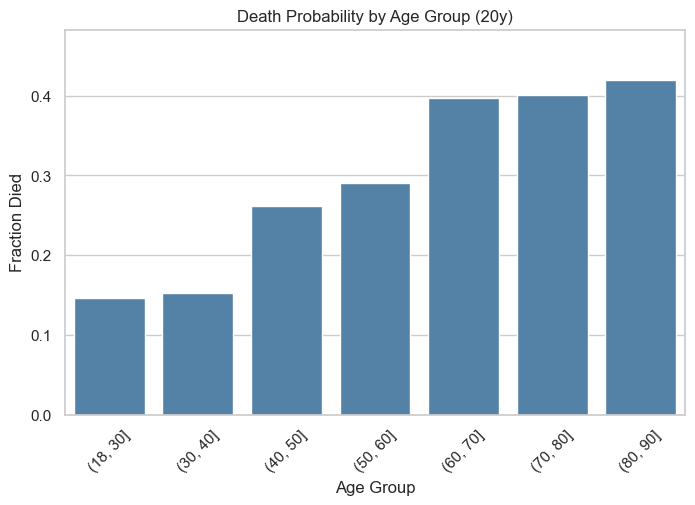

In [21]:
# Death probability by Age Groups
age_bins = [18,30,40,50,60,70,80,90]
age_groups = pd.cut(df["age"], bins=age_bins, right=True)
agg_age = (df.assign(age_group=age_groups)
           .groupby("age_group", observed=False)["died_within_20y"].mean()
           .reset_index(name="death_rate"))

sns.barplot(data=agg_age, x="age_group", y="death_rate", color="steelblue")
plt.title("Death Probability by Age Group (20y)")
plt.ylabel("Fraction Died")
plt.xlabel("Age Group")
plt.xticks(rotation=45)
plt.ylim(0, agg_age["death_rate"].max()*1.15)
plt.show()

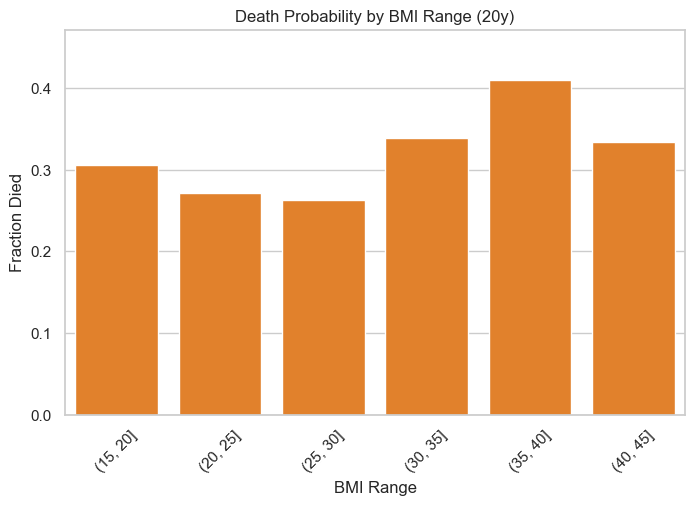

In [22]:
# Death probability by BMI Ranges
bmi_bins = [15,20,25,30,35,40,45]
bmi_groups = pd.cut(df["bmi"], bins=bmi_bins, right=True)
agg_bmi = (df.assign(bmi_group=bmi_groups)
          .groupby("bmi_group", observed=False)["died_within_20y"].mean()
          .reset_index(name="death_rate"))

sns.barplot(data=agg_bmi, x="bmi_group", y="death_rate", color="tab:orange")
plt.title("Death Probability by BMI Range (20y)")
plt.ylabel("Fraction Died")
plt.xlabel("BMI Range")
plt.xticks(rotation=45)
plt.ylim(0, agg_bmi["death_rate"].max()*1.15)
plt.show()

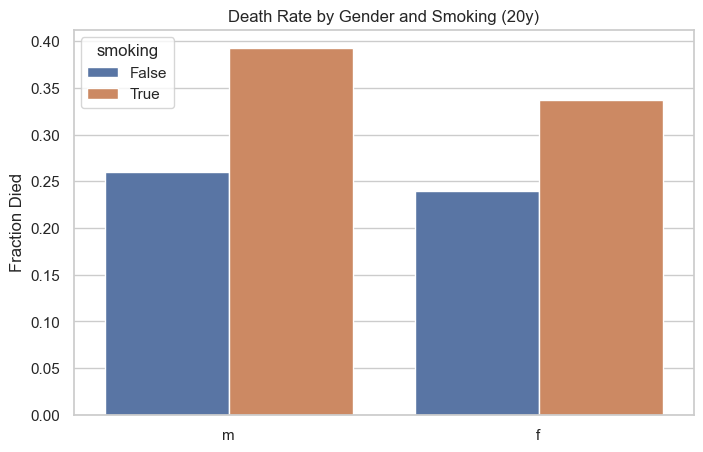

In [23]:
# Death rate by Gender and Smoking
sns.barplot(x="gender", y="died_within_20y", hue="smoking", data=df, estimator=np.mean, errorbar=None)
plt.title("Death Rate by Gender and Smoking (20y)")
plt.ylabel("Fraction Died")
plt.xlabel("")
plt.show()

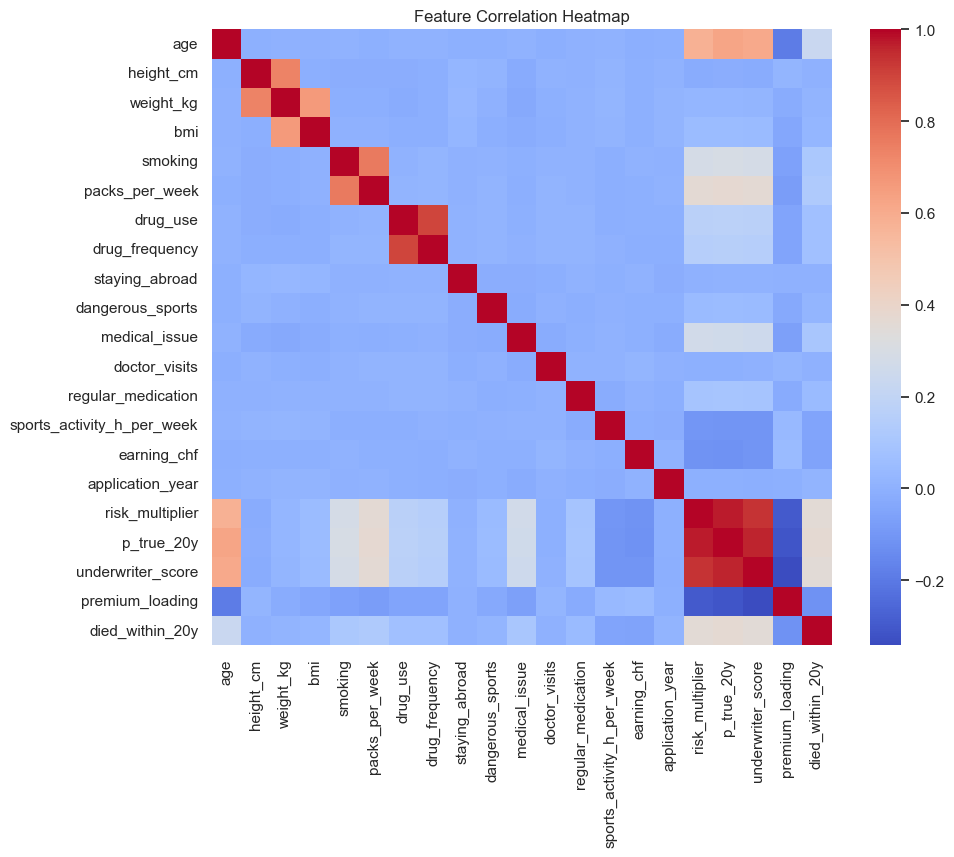

In [24]:
# Correlation heatmap (numeric + bool)
num_df = df.select_dtypes(include=["number", "bool"]).astype(float)
corr = num_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

In [25]:
# Load the new v2 dataset (with decisions)
from pathlib import Path
import json
import pandas as pd

v2_path = Path.cwd() / "synthetic_life_insurance_10000.json"
with open(v2_path, "r", encoding="utf-8") as f:
    data_v2 = json.load(f)
df_v2 = pd.DataFrame(data_v2)
display(df_v2.head())
print("\nShape:", df_v2.shape)
print("Death rate (20y): {:.2%}".format(df_v2["died_within_20y"].mean()))
print("Decision mix:\n", df_v2["underwriter_decision"].value_counts())

,gender,age,marital_status,height_cm,weight_kg,bmi,smoking,packs_per_week,drug_use,drug_frequency,...,medication_type,sports_activity_h_per_week,earning_chf,application_year,risk_multiplier,p_true_20y,underwriter_score,underwriter_decision,premium_loading,died_within_20y
0,m,21,divorced,165,72.4,26.6,False,0,False,0.0,...,safe,4,242187,2005,0.780347,0.0932,0.1027,accept_with_premium,0.12,True
1,m,72,divorced,167,89.1,31.9,True,2,False,0.0,...,warning,9,124800,2009,4.588400,0.5483,0.4847,reject,0.00,False
2,m,26,single,192,95.7,26.0,True,1,False,0.0,...,safe,3,72834,2008,1.253802,0.1498,0.1637,accept_with_premium,0.48,False
3,f,52,married,193,107.2,28.8,False,0,False,0.0,...,safe,10,150285,2006,1.439544,0.1720,0.2059,accept_with_premium,0.74,False
4,f,35,married,197,87.7,22.6,False,0,False,0.0,...,safe,6,186208,2008,0.760137,0.0908,0.1072,accept_with_premium,0.14,True



Shape: (10000, 30)
Death rate (20y): 27.96%
Decision mix:
 underwriter_decision
accept_with_premium    4160
reject                 2546
needs_more_info        2372
accept                  922
Name: count, dtype: int64


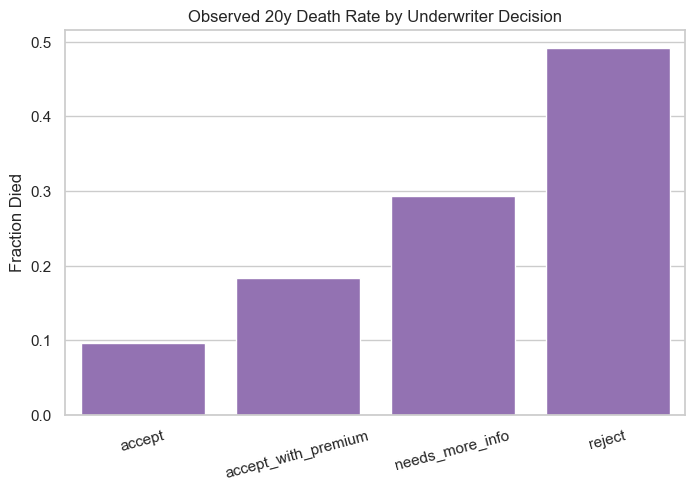

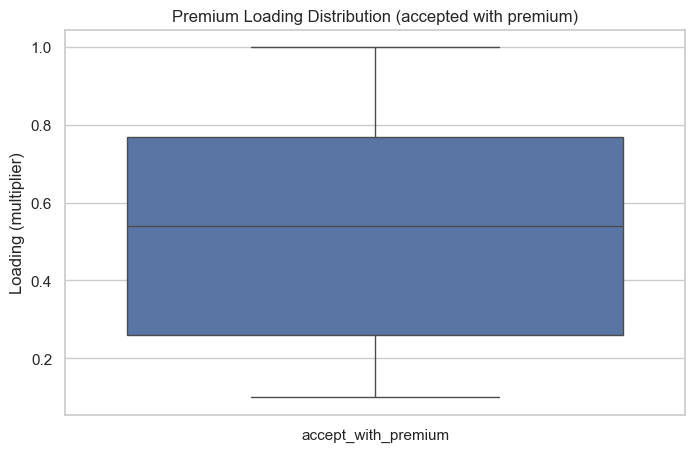

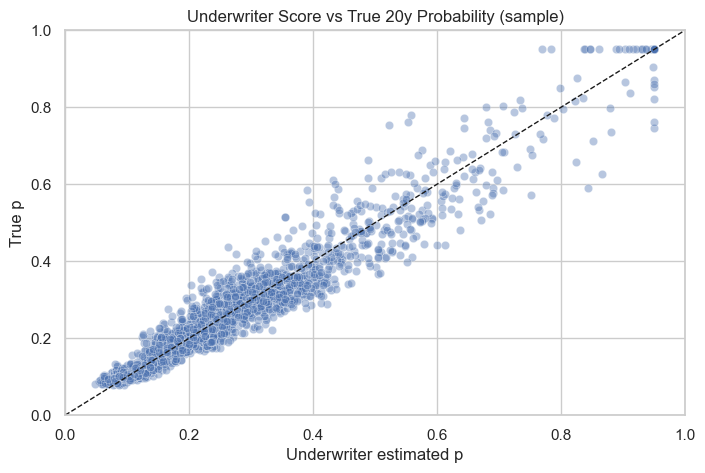

In [26]:
# Decision outcomes: acceptance quality
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Death rate by decision category
dec_death = (df_v2.groupby("underwriter_decision")["died_within_20y"].mean().reset_index())
sns.barplot(data=dec_death, x="underwriter_decision", y="died_within_20y", color="tab:purple")
plt.title("Observed 20y Death Rate by Underwriter Decision")
plt.ylabel("Fraction Died")
plt.xlabel("")
plt.xticks(rotation=15)
plt.show()

# Acceptance rate and premium distribution
ax = sns.boxplot(data=df_v2[df_v2["underwriter_decision"]=="accept_with_premium"], x="underwriter_decision", y="premium_loading")
ax.set_title("Premium Loading Distribution (accepted with premium)")
ax.set_xlabel("")
ax.set_ylabel("Loading (multiplier)")
plt.show()

# Calibration check: predicted vs true probability
sns.scatterplot(data=df_v2.sample(2000, random_state=0), x="underwriter_score", y="p_true_20y", alpha=0.4)
plt.plot([0,1],[0,1],"k--", lw=1)
plt.title("Underwriter Score vs True 20y Probability (sample)")
plt.xlabel("Underwriter estimated p")
plt.ylabel("True p")
plt.xlim(0,1); plt.ylim(0,1)
plt.show()